<a href="https://colab.research.google.com/github/gcavalcantt/music-recommendation/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project with Music Recommendation

# Setting Up the Environment

Setting up the development environment by importing PySpark and Google Drive for data loading, and establishing a connection with the GitHub URL for dataset extraction.

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=9182c68ea97365f7fe3a8a159e2c5d33a92ed925c45a0fc74d41c771fea6c59d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
                           .appName("PySpark Recommender")\
                           .getOrCreate()
spark

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = spark.read.csv('/content/drive/MyDrive/Área de Estudos/Alura/Formações/Apache Spark com Python/spark_database/curso-recomendacao/dados_musicas.csv',
                        header=True,
                        sep=';',
                        inferSchema=True
)

In [6]:
data.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [7]:
data.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



# Data Exploration

Exploring the data using the Plotly library with Express and Graph_Objects methods. To then bring a correlation between the most heard genres over the years.

In [8]:
data.count()

20311

In [9]:
len(data.columns)

19

In [10]:
import pyspark.sql.functions as f

In [11]:
# Checking for null values
data.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in data.columns]).show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [12]:
# Checking all the years in dataframe
print(sorted(data.select('year').distinct().collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


In [13]:
from pyspark import SparkFiles

In [14]:
url_years_data = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'

spark.sparkContext.addFile(url_years_data)
path_data_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')

data_years = spark.read.csv(path_data_file, header=True, inferSchema=True)

In [15]:
data_years.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [16]:
data_years = data_years.filter('year >= 2000')
data_years.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [17]:
data_years.count()

21

In [18]:
len(data_years.columns)

14

In [19]:
import plotly.express as px

fig = px.line(data_years.toPandas(), x='year', y='loudness', markers=True, title='Loudness Variation Over the Years')
fig.show()

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
temp = data_years.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'], name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'], name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'], name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'], name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'], name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'], name='Speechiness'))
fig.show()

In [21]:
fig = px.imshow(data_years.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

# Clustering

Focusing on genre and music itself, vectorizing the data, using libraries like StandardScaler and PCA to fit and for K-Means clustering. Additionally, performing a data plot to check explained variance.

### Genre



In [22]:
url_data_genres = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'

spark.sparkContext.addFile(url_data_genres)
data_file_path = "file://" + SparkFiles.get("dados_musicas_genero.csv")

genres_data = spark.read.csv(data_file_path, header=True, inferSchema=True)

In [23]:
genres_data.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [24]:
genres_data.count()

2973

In [25]:
genres_data.select('genres').distinct().count()

2973

In [26]:
len(genres_data.columns)

14

In [27]:
# Combining features into a single vector column
from pyspark.ml.feature import VectorAssembler

In [28]:
genres_data.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [29]:
X = genres_data.columns
X.remove('genres')
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [30]:
genres_data_vector = VectorAssembler(inputCols=X, outputCol='features').transform(genres_data).select(['features', 'genres'])

In [31]:
genres_data_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [32]:
# Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation
# This shifts the distribution to have a mean of 0 and a standard deviation of 1
from pyspark.ml.feature import StandardScaler

In [33]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(genres_data_vector)
genres_data_scaler = scaler_model.transform(genres_data_vector)

In [34]:
genres_data_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

In [35]:
# Reduces high-dimensional data (3D) to a low-dimensional space (2D)
from pyspark.ml.feature import PCA

In [36]:
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
model_pca = pca.fit(genres_data_scaler)
genres_data_pca = model_pca.transform(genres_data_scaler)

In [37]:
genres_data_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

In [38]:
# Saving and combining all adjusted and vectorized data
from pyspark.ml import Pipeline

In [39]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='scaled_features'),
                                PCA(k=2, inputCol='scaled_features', outputCol='pca_features')])

In [40]:
pca_pipeline_model = pca_pipeline.fit(genres_data)

In [41]:
genres_data_pca = pca_pipeline_model.transform(genres_data)

In [42]:
genres_data_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [43]:
genres_data_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

In [44]:
# Identifies similar data points and creates clusters, aiming to maximize the distance between each cluster
# A smaller Euclidean distance indicates closer points and hence greater similarity.
from pyspark.ml.clustering import KMeans

In [45]:
# setK: sets the number of clusters
# setSeed: sets the same result structure whenever the code is executed
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(1224)

In [46]:
model_kmeans = kmeans.fit(genres_data_pca)

In [47]:
prections_kmeans = model_kmeans.transform(genres_data_pca)

In [48]:
prections_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[-2.5070953668885663,-0.43816913737698293]|2          |
|[0.596967905663348,-4.981612052751353]    |2          |
|[4.158460276223559,0.83665250810799]      |4          |
|[2.3873448785122156,0.4877989015663361]   |0          |
|[2.650121837167907,0.575681976882043]     |0          |
|[1.4965091203367622,-1.8644183183717828]  |2          |
|[3.9235207721573224,-0.28518350023528705] |4          |
|[4.611011109831113,0.6783790472312338]    |1          |
|[2.8376900630842288,0.57129937165805]     |4          |
|[2.706690139892782,1.2593788079708255]    |0          |
|[4.698331383924286,-1.2765569680619455]   |3          |
|[3.375987496679866,-0.7560741064307498]   |4          |
|[5.608998877066019,-1.042731164439324]    |1          |
|[-0.2954946352117699,0.2763864586236268]  |2          |
|[2.572559106287041,1.316981543

### Plotting the Genre Clusters

In [49]:
from pyspark.ml.functions import vector_to_array

In [50]:
pca_features_xy = prections_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                  .withColumn('y', vector_to_array('pca_features')[1])\
                                  .select(['x', 'y', 'cluster_pca', 'genres'])

In [51]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|-2.5070953668885663|-0.43816913737698293|          2|21st century clas...|
|  0.596967905663348|  -4.981612052751353|          2|               432hz|
|  4.158460276223559|    0.83665250810799|          4|               8-bit|
| 2.3873448785122156|  0.4877989015663361|          0|                  []|
|  2.650121837167907|   0.575681976882043|          0|          a cappella|
| 1.4965091203367622| -1.8644183183717828|          2|            abstract|
| 3.9235207721573224|-0.28518350023528705|          4|      abstract beats|
|  4.611011109831113|  0.6783790472312338|          1|    abstract hip hop|
| 2.8376900630842288|    0.57129937165805|          4|           accordeon|
|  2.706690139892782|  1.2593788079708255|          0|           accordion|
|  4.6983313

Checking the varience explained.

In [52]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'genres'])
fig.show()

In [53]:
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

Therefore, X is explaining 3 features and Y is explaining only 1 feature.

### Music

In [54]:
data.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [55]:
X = data.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [56]:
data_encoded_vector = VectorAssembler(inputCols=X, outputCol='features').transform(data)

In [57]:
data_encoded_vector.select('features').show(truncate=False, n=5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [58]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(data_encoded_vector)
music_data_scaler = model_scaler.transform(data_encoded_vector)

In [59]:
music_data_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [60]:
k = len(X)
k

15

In [61]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(music_data_scaler)
music_data_pca = model_pca.transform(music_data_scaler)

In [62]:
sum(model_pca.explainedVariance) * 100
# 15 components explain 99%

100.00000000000003

In [63]:
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

[0.21297354127107349,
 0.3459774162295507,
 0.43989805678254446,
 0.5267820578269103,
 0.6001038103117929,
 0.666571951365239,
 0.7282174213581728,
 0.7845103843321023,
 0.8350002357002614,
 0.8812446547406769,
 0.9151737562703048,
 0.9435370133056039,
 0.9699018569070161,
 0.9900947792885582,
 1.0000000000000002]

In [64]:
import numpy as np

In [65]:
k = sum(np.array(lista_valores) <= 0.7)
k

6

I need to find out the explanation for these 6 components.

In [66]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(music_data_scaler)
final_music_data_pca = model_pca.transform(music_data_scaler)

In [67]:
final_music_data_pca.select('pca_features').show(truncate=False, n=5)
# Confirming the total number of components, which should result in 6

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [68]:
sum(model_pca.explainedVariance) *100

66.6571951365239

In [69]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])

In [70]:
model_pca_pipeline = pca_pipeline.fit(data)

In [71]:
projection = model_pca_pipeline.transform(data)

In [72]:
projection.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [73]:
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=1224)

In [74]:
modelo_kmeans = kmeans.fit(projection)

In [91]:
projection_kmeans = modelo_kmeans.transform(projection)

In [92]:
projection_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



### Plotting the Music Cluster

In [93]:
projection_kmeans = projection_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                   .withColumn('y', vector_to_array('pca_features')[1])

In [94]:
projection_kmeans.select(['x', 'y', 'cluster_pca', 'artists_song']).show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775702| -165.3684878490617|          8|   Coldplay - Yellow|
| -36.49885762774904|-167.85185045616547|          4|OutKast - Ms. Jac...|
| -35.46030091694054|-165.99633344577876|         35|Linkin Park - In ...|
| -35.56301325520582|-165.59515096480598|         16|3 Doors Down - Kr...|
| -36.54556974907565|-167.37512505802474|         34|Eminem - The Real...|
|  -36.7132222902623|  -166.482084830997|         34|Disturbed - Down ...|
| -36.01324617882219|-166.63514920955333|         34| Nelly - Ride Wit Me|
| -36.54268771210487| -166.9792823483323|         23|       Eminem - Stan|
|  -36.4252490097843|-165.10535006330755|         16|*NSYNC - Bye Bye Bye|
| -35.87207491577071| -166.0309883824791|         34|Britney Spears - ...|
|-31.639065936568734|-166

In [95]:
fig = px.scatter(projection_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()

Here, only two components are being displayed.

# Recommendation System

Implementing predictive modelling using SciPy library and the Euclidean function. Connecting to the Spotify database, importing Spotipy to build a richer and more visual recommendation system.

### Preparing Recommender

In [88]:
music_name = 'The Weeknd - Blinding Lights'

In [96]:
cluster = projection_kmeans.filter(projection_kmeans.artists_song == music_name).select('cluster_pca').collect()[0][0]
cluster

22

In [97]:
recommended_songs = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                     .select('artists_song', 'id', 'pca_features')
recommended_songs.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Lifehouse - You A...|0815caqt2Lytro5EI...|[-34.011824491615...|
|Kanye West - I Wo...|4jQqM4NI79HEcWHUJ...|[-34.365897742859...|
|Miley Cyrus - Whe...|7ywzEdEuVG1lsjsRC...|[-34.254386988301...|
|Owl City - Fireflies|3DamFFqW32WihKkTV...|[-35.097726279372...|
|Mumford & Sons - ...|6JnufVNLIO5F5Lk4s...|[-34.721882399994...|
|OneRepublic - Sec...|1NhPKVLsHhFUHIOZ3...|[-35.012207368576...|
|Miley Cyrus - The...|0V8FYVlBFuXXTIvRn...|[-34.230757193592...|
|Bruno Mars - Talk...|161DnLWsx1i3u1JT0...|[-34.033875730328...|
|Justin Bieber - T...|0aPZbnkMoWJaJ5CNV...|[-34.482046389688...|
|Coldplay - Christ...|4fzyvSu73BhGvi96p...|[-33.356079498784...|
|Zac Brown Band - ...|34bqWuFJ4X1A3vCOb...|[-34.147772313250...|
| Coldplay - Paradise|6nek1Nin9q48AVZcW...|[-34.319144753505...|
|Chris Young - Tom...|1qj

In [98]:
music_components = recommended_songs.filter(recommended_songs.artists_song == music_name)\
                                    .select('pca_features').collect()[0][0]
music_components

DenseVector([-35.5146, -167.8188, -12.4276, -141.1164, 12.5266, -5.8604])

In [84]:
# Calculates the Euclidean distance between two points in an n-dimensional space, as well as the straight line connecting them.
from scipy.spatial.distance import euclidean
# Data type conversion
from pyspark.sql.types import FloatType

Testing functions to optimize code execution.

In [103]:
# Test 1
def calculate_distance(value):
    return euclidean(music_components, value)

udf_calculate_distance = f.udf(calculate_distance, FloatType())
recommended_songs_dist = recommended_songs.withColumn('Dist', udf_calculate_distance('pca_features'))
recommended = spark.createDataFrame(recommended_songs_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])
recommended.show()

+--------------------+--------------------+------------------+
|        artists_song|                  id|              Dist|
+--------------------+--------------------+------------------+
|The Weeknd - Blin...|0VjIjW4GlUZAMYd2v...|               0.0|
|Luke Combs - Fore...|6IBcOGPsniK3Pso1w...|1.0858824253082275|
|Imagine Dragons -...|1zB4vmk8tFRmM9UUL...| 1.094283103942871|
|Niall Horan - Bla...|7rpNuuoMbid56XkDs...|1.1934422254562378|
|Marshmello - Silence|7vGuf3Y35N4wmASOK...|1.4141359329223633|
|Morgan Wallen - 7...|0tbjiOUl4k492KPdW...|1.5474177598953247|
|Sam Smith - I’m R...|1fipvP2zmef6vN2Iw...|1.5702728033065796|
|BTS - 00:00 (Zero...|4AlihYDqxXshKhvh5...|1.5726635456085205|
|Zedd - Inside Out...|6IiCb4PCrDgqLuDWg...|1.6317943334579468|
|      Sia - Together|5id3Rqn7SPj1LX4Ff...|1.6830543279647827|
+--------------------+--------------------+------------------+



In [104]:
# Test 2
def recommender(song_name):
    cluster = projection_kmeans.filter(projection_kmeans.artists_song == song_name).select('cluster_pca').collect()[0][0]

    recommended_songs = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                         .select('artists_song', 'id', 'pca_features')

    music_components = recommended_songs.filter(recommended_songs.artists_song == song_name)\
                                       .select('pca_features').collect()[0][0]

### Recommender with SpotiPy


In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 7.3 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [ ]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
        client_id = 'd46f615d245f42f49cd6591c824660d9',
        client_secret = '75004a11f7de4654b5e55a0b8b2f6042')

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id = 'd46f615d245f42f49cd6591c824660d9',
                                                      client_secret = '75004a11f7de4654b5e55a0b8b2f6042')


sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
id = projection_kmeans.filter(projection_kmeans.artists_song == music_name).select('id').collect()[0][0]
id

'0VjIjW4GlUZAMYd2vXMi3b'

In [ ]:
sp.track(id)

{'album': {'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Xyo4u8uXC1ZmMpatF05PJ'},
    'href': 'https://api.spotify.com/v1/artists/1Xyo4u8uXC1ZmMpatF05PJ',
    'id': '1Xyo4u8uXC1ZmMpatF05PJ',
    'name': 'The Weeknd',
    'type': 'artist',
    'uri': 'spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
  

Definitive function.

In [ ]:
def recommender(song_name):
    # Calculate recommended songs
    cluster = projection_kmeans.filter(projection_kmeans.artists_song == song_name).select('cluster_pca').collect()[0][0]

    recommended_songs = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                         .select('artists_song', 'id', 'pca_features')

    music_components = recommended_songs.filter(recommended_songs.artists_song == song_name)\
                                       .select('pca_features').collect()[0][0]

    def calculate_distance(value):
        return euclidean(music_components, value)

    udf_calculate_distance = f.udf(calculate_distance, FloatType())
    recommended_songs_dist = recommended_songs.withColumn('Dist', udf_calculate_distance('pca_features'))
    recommended = spark.createDataFrame(recommended_songs_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])
    recommended.select('artists_song').show(truncate=False)

    # Fetch information from API
    playlist_ids = recommended.select('id').collect()

    playlist_tracks = []

    for playlist_id in playlist_ids:
        playlist_tracks.append(sp.track(playlist_id[0]))

    return len(playlist_tracks)

In [ ]:
recommender('The Weeknd - Blinding Lights')

+----------------------------------------+
|artists_song                            |
+----------------------------------------+
|The Weeknd - Blinding Lights            |
|Luke Combs - Forever After All          |
|Imagine Dragons - Thunder               |
|Niall Horan - Black And White           |
|Marshmello - Silence                    |
|Morgan Wallen - 7 Summers               |
|Sam Smith - I’m Ready (with Demi Lovato)|
|BTS - 00:00 (Zero O’Clock)              |
|Zedd - Inside Out (feat. Griff)         |
|Sia - Together                          |
+----------------------------------------+



10

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

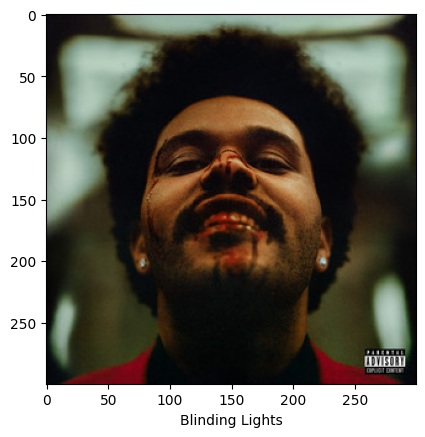

In [ ]:
music_name = 'The Weeknd - Blinding Lights'

id = projection_kmeans\
          .filter(projection_kmeans.artists_song == music_name)\
          .select('id').collect()[0][0]

track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

In [ ]:
# Function that allows visualizing multiple music album covers in a grid of subplots, where each subplot displays an image of the corresponding album cover along with the song name as a label.
def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()

In [ ]:
# Retrieves and stores specific information about each recommended music track, such as the name and URL of the album image, using the Spotify API.
playlist_id = recommended.select('id').collect()

name = []
url = []
for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

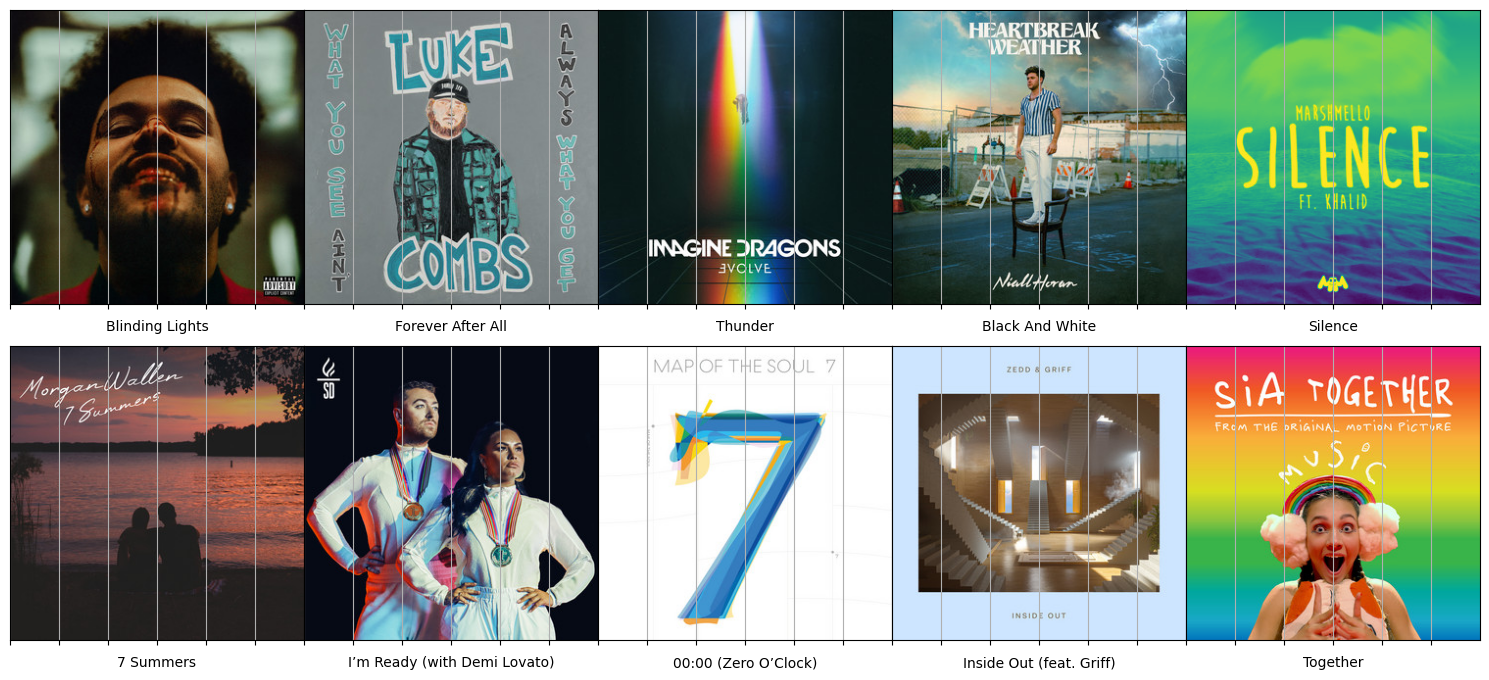

In [ ]:
visualize_songs(name,url)